In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/edoardo/GitProjects/rl_recsys/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
user_features = np.random.uniform(-1, 1, 14)
#  plt.scatter(np.arange(14), np.random.uniform(-1, 1, 14))

In [47]:
def generate_state2(user_features) -> torch.Tensor:
    user_state = user_features.copy()
    
    tgt_feature_idx = None
    tgt_feat_val = -1
    while tgt_feat_val < 0:
        tgt_feature_idx = np.random.randint(0, len(user_features), size=(1,))
        tgt_feat_val = user_features[tgt_feature_idx]
    
    # sample alpha from a uniform distribution
    alpha = np.random.uniform()
    print(alpha)
    print(tgt_feature_idx)
    
    pos_sum = np.sum(user_state[user_state>0])
    pos_val_count = len(user_state[user_state>0])
    
    user_state[tgt_feature_idx] = user_state[tgt_feature_idx] + (2*alpha)
    user_state[user_state>0] -= alpha/pos_val_count
    
    if user_state[tgt_feature_idx] > 1:
        user_state[user_state>0]/=user_state[tgt_feature_idx]

    return user_state

In [54]:
intent=generate_state2(user_features)

0.7016261674470075
[2]


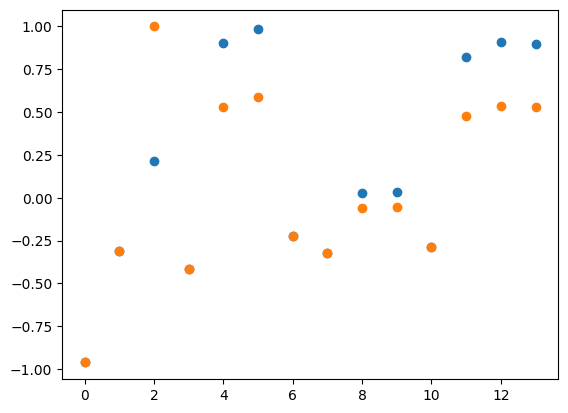

In [55]:
plt.scatter(np.arange(14), user_features)
plt.scatter(np.arange(14), intent)

In [ ]:
def generate_state(user_features: torch.Tensor) -> torch.Tensor:
    user_state = torch.Tensor(user_features).clone()
    # sample alpha from a uniform distribution
    alpha = torch.rand(1)
    # alpha = 0.8
    alpha = 0.8 * alpha + 0.2  # alpha between 0.2 and 1

    print(alpha)
    inv_alpha = 1 - alpha

    # creating tgt feature mask and inverse mask
    feat_mask = torch.zeros(len(user_state))
    inv_feat_mask = torch.ones(len(user_state))

    tgt_feature_idx = None
    tgt_feat_val = -1
    while tgt_feat_val < 0:
        tgt_feature_idx = torch.randint(0, len(user_features), size=(1,))
        tgt_feat_val = user_features[tgt_feature_idx]

    print(tgt_feature_idx, tgt_feat_val)
    # select target feature randomly
    feat_mask[tgt_feature_idx] = 1
    
    inv_feat_mask[tgt_feature_idx] = 0
    inv_feat_mask[user_features < 0] = 0

    user_state[feat_mask == 1] = alpha * user_state[feat_mask == 1]
    user_state[inv_feat_mask == 1] = (
        inv_alpha/(len(user_features[user_features>0])-1)* user_state[inv_feat_mask == 1]
    )

    return user_state